In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BOS211.csv', sep =';', low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: 'BOS211.csv'

In [ ]:
df['05'].value_counts()

In [ ]:
df['05'].isnull().sum()

In [ ]:
df.columns

In [ ]:
df['09'].value_counts()
        

In [ ]:
df

In [ ]:
df['F119'].value_counts()

In [3]:
df2 = pd.read_csv('BOS211-7919015E-VT450903_2021-12-13_2021-12-13_SIGNAL_GROUP-unfiltered.csv', sep = ';')

FileNotFoundError: [Errno 2] No such file or directory: 'BOS211-7919015E-VT450903_2021-12-13_2021-12-13_SIGNAL_GROUP-unfiltered.csv'

In [4]:
df2

NameError: name 'df2' is not defined

In [5]:
df3 = pd.read_csv('BOS211-7919015E-VT450903_2021-12-13_2021-12-13_SIGNAL_GROUP-filtered.csv', sep = ';')

FileNotFoundError: [Errno 2] No such file or directory: 'BOS211-7919015E-VT450903_2021-12-13_2021-12-13_SIGNAL_GROUP-filtered.csv'

In [6]:
df2.head()

NameError: name 'df2' is not defined

In [7]:
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt

def xml_to_dict(filename):
    with open(filename) as t:
        data = t.read()
        xmldict = xmltodict.parse(data)
    return xmldict

def lanedata_extract(filename):
    #import xml as dict
    xmldict = xml_to_dict(filename)

    #access the lanesets in the dict
    lanesets = xmldict['topology']['mapData']['intersections']['intersectionGeometry']['laneSet']['genericLane']

    #extract lane data
    lanedata = []
    for lane in lanesets: #for every lane in lanesets
        for node in lane['nodes']['nodeXY']: #for every node in lane
            lat, long = node['node-LatLon']['lat'], node['node-LatLon']['lon'] #extract lat and long
            lanedata.append((float(lat) / 10000000, float(long) / 10000000)) #divide so we get the correct values
    
    lanedf = pd.DataFrame(lanedata)#convert collected data to a dataframe
    lanedf.columns = ['lat', 'long'] #set column names
    
    return lanedf

def inductionloop_extract(filename):
    #import xml as dict
    xmldict = xml_to_dict(filename)
    
    #access the sensorsets in the dict
    sensorsets = xmldict['topology']['controlData']['controller']['controlUnits']['controlUnit']['controlledIntersections']['controlledIntersection']['sensors']['sensor']
    
    #extract the loop info
    loop_data = []
    for sensor in sensorsets:
        sensor_type = sensor['sensorDeviceType']
        if sensor_type == 'inductionLoop': #only extract data if its an inductionLoop
            lat, long = sensor['sensorPosition']['lat'], sensor['sensorPosition']['long']
            loop_data.append((float(lat) / 10000000, float(long) / 10000000))

    sensordf = pd.DataFrame(loop_data)
    sensordf.columns = ['lat', 'long']

    return sensordf

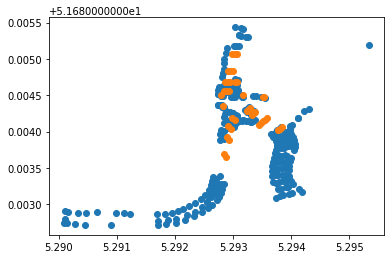

In [8]:
def plotmappie(filename):
    #get both loops and lanes
    loops = inductionloop_extract(filename)
    lanes = lanedata_extract(filename)
    
    #plot the points
    plt.scatter(x=lanes['long'], y=lanes['lat'])
    plt.scatter(x=loops['long'], y=loops['lat'])
    plt.show()

plotmappie("7919015E_BOS211_ITF_COMPLETE.xml")

In [9]:
lanedf = lanedata_extract('7919015E_BOS211_ITF_COMPLETE.xml')
lat = lanedf.lat
long = lanedf.long

In [60]:
xml = (xml_to_dict('7919015E_BOS211_ITF_COMPLETE.xml')['topology']['mapData']['intersections']['intersectionGeometry']['laneSet']['genericLane'])
for x in xml:
    
    
    if x['laneAttributes']['sharedWith'] == '0001000000':
        
        connect_dict = {}
        try:
            connect_dict[x['laneID']] = [{'connecting_lane': x['connectsTo']['connection']['connectingLane']['lane'], 'maneuver':x['connectsTo']['connection']['connectingLane']['maneuver']}]
        except TypeError:
            
            temp_list = []
            for i in x['connectsTo']['connection']:
                temp_list.append({'connecting_lane': i['connectingLane']['lane'], 'maneuver':i['connectingLane']['maneuver']})
            connect_dict[x['laneID']] = temp_list
        except KeyError:
            pass
            
        print(connect_dict)

{'1': [{'connecting_lane': '19', 'maneuver': '001000000000'}]}
{'2': [{'connecting_lane': '21', 'maneuver': '100000000000'}]}
{'3': [{'connecting_lane': '20', 'maneuver': '100000000000'}]}
{'7': [{'connecting_lane': '20', 'maneuver': '001000000000'}, {'connecting_lane': '21', 'maneuver': '001000000000'}]}
{'8': [{'connecting_lane': '17', 'maneuver': '010000000000'}, {'connecting_lane': '18', 'maneuver': '010000000000'}]}
{'13': [{'connecting_lane': '18', 'maneuver': '100000000000'}]}
{'14': [{'connecting_lane': '17', 'maneuver': '100000000000'}]}
{'15': [{'connecting_lane': '19', 'maneuver': '010000000000'}]}
{}
{}
{}
{}
{}


In [10]:
import matplotlib.pyplot as plt

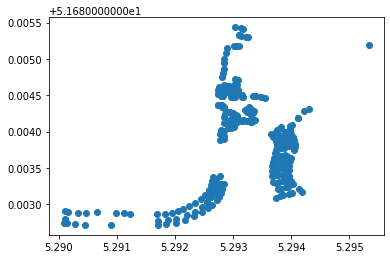

In [11]:
plt.scatter(long,lat)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

In [13]:
def scale_lat_long(lat,long, grid_size = 100):

    scaler = MinMaxScaler()
    scaled_lat = list([int(abs(round(float(x),len(str(grid_size))-1) * grid_size)) for x in scaler.fit_transform(np.array(lat).reshape(-1,1))])
    scaled_long = list([int(abs(round(float(x),len(str(grid_size))-1) * grid_size)) for x in scaler.fit_transform(np.array(long).reshape(-1,1))])
    
    return list(set(zip(scaled_long,scaled_lat)))

In [14]:
dat = scale_lat_long(lat,long)

NameError: name 'MinMaxScaler' is not defined

In [15]:
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [16]:
kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(dat)

NameError: name 'KMeans' is not defined

In [17]:
test = inductionloop_extract('7919015E_BOS211_ITF_COMPLETE.xml')
x = test.long
y = test.lat

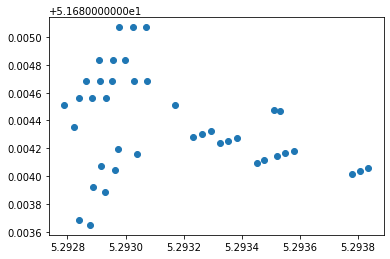

In [18]:
plt.scatter(x,y)

In [19]:
kmeans = KMeans(n_clusters=15, random_state=0).fit_predict(list(zip(x,y)))

NameError: name 'KMeans' is not defined

In [ ]:
kmeans

In [ ]:
plt.scatter(x,y, c = kmeans)

In [ ]:
xmldict = xml_to_dict('7919015E_BOS211_ITF_COMPLETE.xml')
    
sensorsets = xmldict['topology']['controlData']['controller']['controlUnits']['controlUnit']['controlledIntersections']['controlledIntersection']['sensors']['sensor']



In [ ]:
for x in sensorsets:
    print(x)
    print()

In [ ]:
sensor_dict = {x['name']: {'laneID' : x['sensorAllocations']['sensorAllocation']['laneID'], 'lat':x['sensorPosition']['lat'], 'long':x['sensorPosition']['long'], 'length': x['length'], 'distance': x['sensorAllocations']['sensorAllocation']['distance']} for x in sensorsets if x['sensorDeviceType'] == 'inductionLoop' }

In [ ]:
pd.DataFrame([x['laneID'] for x in sensor_dict.values()]).value_counts()

In [ ]:
sensor_dict

In [ ]:
laneattributes = xmldict['topology']['mapData']['intersections']['intersectionGeometry']['laneSet']['genericLane']

In [ ]:
laneattributes

In [ ]:
lane_traffic_dict = {x['laneID']:x['laneAttributes']['sharedWith'] for x in laneattributes}

In [ ]:
for k in sensor_dict:
    sensor_dict[k]['sharedWith'] = lane_traffic_dict[sensor_dict[k]['laneID']]

In [ ]:
s_df = pd.DataFrame(sensor_dict).T

In [ ]:
#s_df = s_df[s_df.sharedWith == '0001000000']

In [ ]:
temp = np.array(scale_lat_long(s_df.lat,s_df.long))

In [ ]:
s_df['lat_conv'] = temp[:,0]

In [ ]:
s_df['long_conv'] = temp[:,1]

In [ ]:
s_df

In [ ]:
fig, ax = plt.subplots()
ax.scatter(s_df.lat_conv, s_df.long_conv, c = s_df.laneID.astype(int), cmap = plt.get_cmap('prism'))

for i, txt in enumerate(s_df.laneID):
    ax.annotate(txt, (s_df.lat_conv[i],s_df.long_conv[i]))

In [ ]:
s_df.laneID.value_counts()

In [ ]:
[float(x) for x in s_df.laneID]

In [ ]:
len(set(s_df.laneID))

In [ ]:
xmldict = xml_to_dict('7919015E_BOS211_ITF_COMPLETE.xml')

lanesets = xmldict['topology']['mapData']['intersections']['intersectionGeometry']['laneSet']['genericLane']



df = pd.DataFrame([x for x in lanesets if x['laneAttributes']['sharedWith'] == '0001000000'])

In [ ]:
l = list(set(list(set(df.ingressApproach)) + (list(set(df.egressApproach)))))
l.remove(np.NaN)
len(l)

In [ ]:
coefs = []

for x in lanesets:
    if x['laneAttributes']['sharedWith'] == '0001000000':
        
        try:
            print(x['ingressApproach'])
        except:
            print(x['egressApproach'])
        
        test = []
        for i in (x['nodes']['nodeXY']):
            test.append((float(i['node-LatLon']['lat']),float(i['node-LatLon']['lon'])))
        
        
        coords = np.array(test)
        thing = [coords[0],coords[-1]]
        reg = LinearRegression().fit(np.array(thing)[:,0].reshape(-1,1),np.array(thing)[:,1].reshape(-1,1))
        coefs.append(reg.coef_)

print(coefs)
print()


import math
[math.atan(x) for x in coefs]
    

In [ ]:
x = np.linspace(-1,1,100)
for count, i in enumerate(coefs):
    
    plt.plot(x, coefs[count][0]*x)
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.grid()
plt.show()

In [ ]:
import geopy.distance

div = 10000000

coords_1 = (516841400 , 52933456 )
coords_2 = (516831191, 52938160)

#print(coords_1,coords_2)

#print(geopy.distance.distance(coords_1, coords_2).m)

In [ ]:
scale_lat_long(coords_1,coords_2, grid_size = 100)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(np.array(coords_1).reshape(-1,1),np.array(coords_2).reshape(-1,1))

In [ ]:
reg.coef_

In [ ]:
reg = LinearRegression().fit(scaled_coords[:,0].reshape(-1,1),scaled_coords[:,1].reshape(-1,1))

In [ ]:
reg.coef_